# Introduction to the xgbsurv package - EH

This notebook introduces `xgbsurv` using a specific dataset. It structured by the following steps:

- Load data
- Load model
- Fit model
- Predict and evaluate model

The syntax conveniently follows that of sklearn.

In [1]:
from xgbsurv.datasets import load_metabric
from xgbsurv import XGBSurv
from xgbsurv.models.utils import sort_X_y, transform_back, sort_X_y_pandas
from pycox.evaluation import EvalSurv
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
current_path = os.getcwd() 
one_level_up = os.path.abspath(os.path.join(current_path,  ".."))

## Load Data

In [2]:
data = load_metabric(path=one_level_up+"/xgbsurv/datasets/data/", as_frame=True)
# stratify by event indicated by sign
target_sign = np.sign(data.target)
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, stratify=target_sign)
# sort data
X_train, y_train = sort_X_y_pandas(X_train, y_train)
y_train = pd.concat([y_train,y_train], axis=1)
y_train.columns = ['target1', 'target2']
X_test, y_test = sort_X_y_pandas(X_test, y_test)

## Load Model

In [3]:
model = XGBSurv(n_estimators=100, objective="eh_objective",
                                             eval_metric="eh_loss",
                                             learning_rate=0.3,
                                             random_state=42, 
                                             disable_default_eval_metric=1,
                                             )
model

XGBSurv(base_score=None, booster=None, callbacks=None, colsample_bylevel=None,
        colsample_bynode=None, colsample_bytree=None,
        disable_default_eval_metric=1, early_stopping_rounds=None,
        enable_categorical=False,
        eval_metric=CPUDispatcher(<function eh_likelihood at 0x176532980>),
        feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
        importance_type=None, interaction_constraints=None, learning_rate=0.3,
        max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
        max_delta_step=None, max_depth=None, max_leaves=None,
        min_child_weight=None, missing=nan, monotone_constraints=None,
        n_estimators=100, n_jobs=None, num_parallel_tree=None,
        objective=CPUDispatcher(<function eh_objective at 0x176533100>), ...)

The options of loss and objective functions can be obtained like below:

In [4]:
print(model.get_loss_functions().keys())
print(model.get_objective_functions().keys())

dict_keys(['breslow_loss', 'efron_loss', 'cind_loss', 'deephit_loss', 'aft_loss', 'ah_loss', 'eh_loss'])
dict_keys(['breslow_objective', 'efron_objective', 'cind_objective', 'deephit_objective', 'aft_objective', 'ah_objective', 'eh_objective'])


## Fit Model

In [5]:
eval_set = [(X_train, y_train)]

In [6]:
model.fit(X_train, y_train, eval_set=eval_set)

Data type is not correct - use either pandas DataFrame/Series or numpy ndarray. 
[0]	validation_0-eh_likelihood:2557.10650
[1]	validation_0-eh_likelihood:2537.59223
[2]	validation_0-eh_likelihood:2517.61340
[3]	validation_0-eh_likelihood:2497.44811
[4]	validation_0-eh_likelihood:2481.28753
[5]	validation_0-eh_likelihood:2464.45708
[6]	validation_0-eh_likelihood:2447.47449
[7]	validation_0-eh_likelihood:2429.89252
[8]	validation_0-eh_likelihood:2412.75665
[9]	validation_0-eh_likelihood:2391.02645
[10]	validation_0-eh_likelihood:2374.42113
[11]	validation_0-eh_likelihood:2359.24142
[12]	validation_0-eh_likelihood:2340.99202
[13]	validation_0-eh_likelihood:2317.44070
[14]	validation_0-eh_likelihood:2298.83226
[15]	validation_0-eh_likelihood:2279.24846
[16]	validation_0-eh_likelihood:2266.69866
[17]	validation_0-eh_likelihood:2254.74185
[18]	validation_0-eh_likelihood:2242.74450
[19]	validation_0-eh_likelihood:2220.67664
[20]	validation_0-eh_likelihood:2208.31054
[21]	validation_0-eh_likel

XGBSurv(base_score=None, booster=None, callbacks=None, colsample_bylevel=None,
        colsample_bynode=None, colsample_bytree=None,
        disable_default_eval_metric=1, early_stopping_rounds=None,
        enable_categorical=False,
        eval_metric=CPUDispatcher(<function eh_likelihood at 0x176532980>),
        feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
        importance_type=None, interaction_constraints=None, learning_rate=0.3,
        max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
        max_delta_step=None, max_depth=None, max_leaves=None,
        min_child_weight=None, missing=nan, monotone_constraints=None,
        n_estimators=100, n_jobs=None, num_parallel_tree=None,
        objective=CPUDispatcher(<function eh_objective at 0x176533100>), ...)

The model can be saved like below. Note that objective and eval_metric are not saved.

In [7]:
#model.save_model("introduction_model_breslow.json")

## Predict

In [8]:
preds_train = model.predict(X_train, output_margin=True)
preds_test = model.predict(X_test, output_margin=True)

### Predict Cumulative Hazard

In [9]:
df_cum_hazards = model.predict_cumulative_hazard_function(X_train.to_numpy(), X_test.to_numpy(), y_train.to_numpy(), y_test.to_numpy())
df_cum_hazards.tail(3)

integration_values.shape[0] 91564


,0,1,2,3,4,5,6,7,8,9,...,466,467,468,469,470,471,472,473,474,475
299.399994,1.468990,2.805342,5.269084,2.075346,2.152511,2.292607,2.194230,2.314440,2.332852,1.193653,...,1.688367,0.443537,1.668636,5.714819,0.743076,1.243939,1.954172,1.634828,2.169060,0.646752
322.833344,1.477181,2.806536,5.310263,2.293927,2.160190,2.292885,2.331486,2.746846,2.348609,1.197296,...,1.929700,0.501414,1.747693,6.857201,0.743123,1.245690,2.084330,1.823439,2.412873,0.789741
335.600006,1.479794,2.806870,5.323672,2.394498,2.162561,2.292959,2.388063,2.979499,2.361232,1.198414,...,2.050099,0.529537,1.778772,7.484111,0.743135,1.246206,2.139067,1.912492,2.526772,0.878592


## Predict Survival Function

In [10]:
df_survival_function = model.predict_survival_function(X_train.to_numpy(), X_test.to_numpy(), y_train.to_numpy(), y_test.to_numpy())
df_survival_function.tail(3)

integration_values.shape[0] 91564


,0,1,2,3,4,5,6,7,8,9,...,466,467,468,469,470,471,472,473,474,475
299.399994,0.230158,0.060486,0.005148,0.125513,0.116192,0.101003,0.111444,0.098822,0.097019,0.303112,...,0.184821,0.641763,0.188504,0.003297,0.475648,0.288247,0.141682,0.194986,0.114285,0.523744
322.833344,0.228280,0.060414,0.004941,0.100870,0.115303,0.100975,0.097151,0.064130,0.095502,0.302010,...,0.145192,0.605674,0.174175,0.001052,0.475626,0.287742,0.124390,0.161470,0.089558,0.453962
335.600006,0.227685,0.060394,0.004875,0.091218,0.115030,0.100967,0.091807,0.050818,0.094304,0.301672,...,0.128722,0.588878,0.168845,0.000562,0.475620,0.287594,0.117765,0.147712,0.079917,0.415367


### Visualize Predictions

Text(0.5, 1.0, 'Cumulative Hazard Breslow')

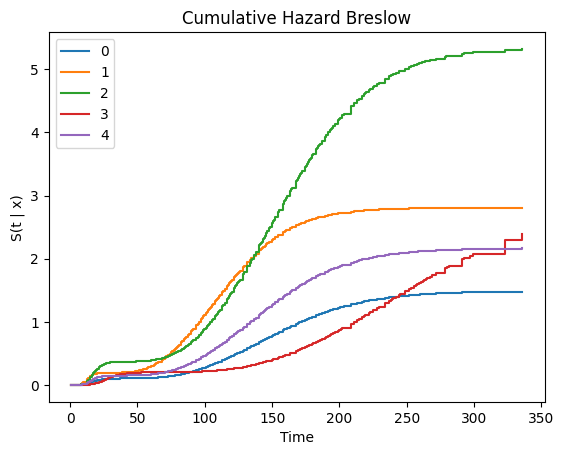

In [11]:
df_cum_hazards.iloc[:, :5].plot(drawstyle='steps-post')
plt.ylabel('S(t | x)')
_ = plt.xlabel('Time')
plt.title("Cumulative Hazard EH")

Text(0.5, 1.0, 'Survival Curve Breslow')

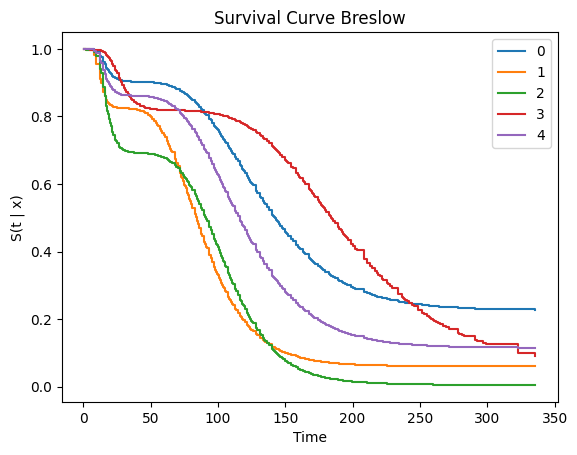

In [12]:
df_survival_function.iloc[:, :5].plot(drawstyle='steps-post')
plt.ylabel('S(t | x)')
_ = plt.xlabel('Time')
plt.title("Survival Curve EH")

## Evaluate

### Test

In [13]:
durations_test, events_test = transform_back(y_test.values)
time_grid = np.linspace(durations_test.min(), durations_test.max(), 100)
ev = EvalSurv(df_survival_function, durations_test, events_test, censor_surv='km')
print('Concordance Index',ev.concordance_td('antolini'))

Concordance Index 0.6362757358154886


In [14]:
print('Integrated Brier Score:',ev.integrated_brier_score(time_grid))

Integrated Brier Score: 0.17641782534742892
